In [11]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
cifar_10 = keras.datasets.cifar10

## Fashion Minist
### MLP

In [13]:
(x_train_full_mlp, y_train_full_mlp), (x_test_mlp, y_test_mlp) = fashion_mnist.load_data()

In [14]:
X_valid_mlp, X_train_mlp = x_train_full_mlp[:5000]/255.0, x_train_full_mlp[5000:]/255.0
y_valid_mlp, y_train_mlp = y_train_full_mlp[:5000], y_train_full_mlp[5000:]
X_test_mlp = x_test_mlp/255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
model_mlp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1


2022-11-07 16:24:28.181861: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 16:24:28.182265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model_mlp.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='sgd',
                  metrics=['accuracy'])

In [9]:
history = model_mlp.fit(X_train_mlp, y_train_mlp, epochs=30, 
                        validation_data=(X_valid_mlp, y_valid_mlp))

Epoch 1/30


2022-11-07 16:24:28.792735: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-07 16:24:29.039395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7002 - accuracy: 0.7722

2022-11-07 16:24:39.756785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 12s 6ms/step - loss: 0.7002 - accuracy: 0.7722 - val_loss: 0.5092 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4877 - accuracy: 0.8297 - val_loss: 0.4499 - val_accuracy: 0.8444
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4438 - accuracy: 0.8441 - val_loss: 0.4208 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4166 - accuracy: 0.8537 - val_loss: 0.3941 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3966 - accuracy: 0.8598 - val_loss: 0.3856 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3803 - accuracy: 0.8655 - val_loss: 0.3761 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3659 - accuracy: 0.8689 - val_loss: 0.3616 - val_accuracy: 0.8

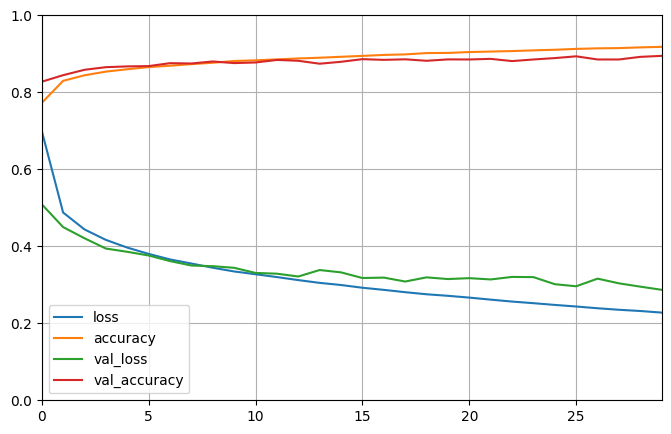

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.gca().set_xlim(0,29)
plt.show()

In [11]:
model_mlp.evaluate(X_test_mlp, y_test_mlp)

313/313 [==============================] - 1s 4ms/step - loss: 0.3256 - accuracy: 0.8874


[0.32560834288597107, 0.8874000310897827]

In [12]:
X_new_mlp = X_test_mlp[:3]
y_proba_mlp = model_mlp.predict(X_new_mlp)

1/1 [==============================] - 0s 109ms/step


2022-11-07 16:29:34.057781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [13]:
y_pred_mlp = np.argmax(y_proba_mlp, axis=1)

In [14]:
prediction_mlp = np.array(class_names)[y_pred_mlp]

In [15]:
y_new_mlp = y_test_mlp[:3]
result_mlp = np.array(class_names)[y_new_mlp]

In [16]:
print(prediction_mlp)
print(result_mlp)

['Ankle boot' 'Pullover' 'Trouser']
['Ankle boot' 'Pullover' 'Trouser']


### CNN

In [17]:
(x_train_full_cnn, y_train_full_cnn), (x_test_cnn, y_test_cnn) = fashion_mnist.load_data()

In [18]:
X_valid_cnn, X_train_cnn = x_train_full_cnn[:5000]/255.0, x_train_full_cnn[5000:]/255.0
y_valid_cnn, y_train_cnn = y_train_full_cnn[:5000], y_train_full_cnn[5000:]
X_test_cnn = x_test_cnn/255.0

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', 
                        input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [22]:
model_cnn.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='sgd',
                  metrics=['accuracy'])

In [23]:
history = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=30, 
                        validation_data=(X_valid_cnn, y_valid_cnn))

Epoch 1/30


2022-11-07 16:38:02.249563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.2437 - accuracy: 0.5333

2022-11-07 16:39:06.248113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 66s 37ms/step - loss: 1.2437 - accuracy: 0.5333 - val_loss: 0.6701 - val_accuracy: 0.7568
Epoch 2/30
1719/1719 [==============================] - 62s 36ms/step - loss: 0.6767 - accuracy: 0.7482 - val_loss: 0.5123 - val_accuracy: 0.8086
Epoch 3/30
1719/1719 [==============================] - 62s 36ms/step - loss: 0.5476 - accuracy: 0.7998 - val_loss: 0.4348 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4755 - accuracy: 0.8268 - val_loss: 0.4161 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 59s 34ms/step - loss: 0.4339 - accuracy: 0.8438 - val_loss: 0.3682 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4002 - accuracy: 0.8555 - val_loss: 0.3566 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3740 - accuracy: 0.8647 - val_loss: 0.4096 - val_accura

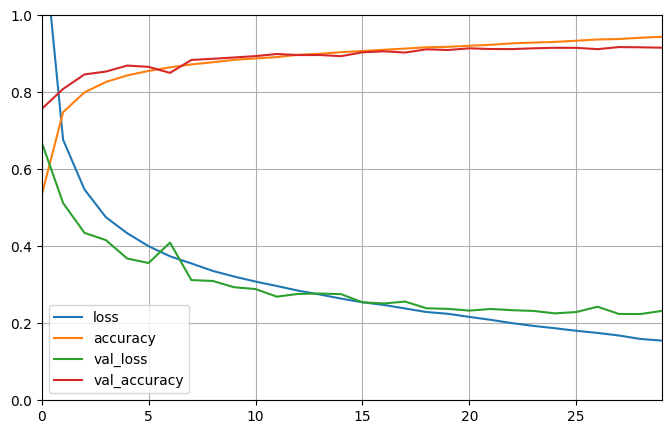

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.gca().set_xlim(0,29)
plt.show()

In [25]:
model_mlp.evaluate(X_test_cnn, y_test_cnn)

313/313 [==============================] - 1s 4ms/step - loss: 0.3256 - accuracy: 0.8874


[0.32560834288597107, 0.8874000310897827]

In [26]:
X_new_cnn = X_test_cnn[:3]
y_proba_cnn = model_cnn.predict(X_new_cnn)

2022-11-07 17:28:26.819887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 522ms/step


In [27]:
y_pred_cnn = np.argmax(y_proba_cnn, axis=1)

In [30]:
prediction_cnn = np.array(class_names)[y_pred_cnn]

In [28]:
y_new_cnn = y_test_cnn[:3]
result_cnn = np.array(class_names)[y_new_cnn]

In [31]:
print(prediction_cnn)
print(result_cnn)

['Ankle boot' 'Pullover' 'Trouser']
['Ankle boot' 'Pullover' 'Trouser']


In [16]:
X_valid_mlp[0].shape

(28, 28)